In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE 
from sklearn.metrics import confusion_matrix

## Get Data

In [14]:
X_train = pd.read_csv("data/X_train.csv")
Y_train = pd.read_csv("data/y_train.csv", names=['y'])
X_test = pd.read_csv("data/X_test.csv")
Y_test = pd.read_csv("data/y_test.csv", names=['y'])

In [15]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,60008.0,1.236016,-0.532254,-1.598697,-2.000970,1.847243,2.866321,-0.403133,0.674711,0.982541,...,0.140849,0.074687,0.067211,-0.252346,1.034092,0.936118,-0.585707,0.037147,0.024835,69.41
1,87730.0,-1.354662,0.132957,-0.071744,-2.143004,3.883435,3.105698,0.333710,0.730099,-0.246574,...,0.015409,-0.412867,-1.043888,-0.421561,0.711301,0.606336,0.241368,-0.003143,-0.170308,0.99
2,9340.0,1.217838,0.430202,0.423582,0.845296,-0.098465,-0.553254,-0.076397,-0.152638,1.294955,...,-0.149407,-0.409539,-0.891155,0.169831,-0.023733,0.124676,0.085188,-0.032357,0.021126,0.99
3,129550.0,2.083280,-0.075132,-1.358963,0.260593,0.227679,-0.800119,0.226624,-0.325823,0.503781,...,-0.137106,-0.319557,-0.788921,0.235359,-0.638908,-0.192862,0.235392,-0.070786,-0.063230,16.34
4,68748.0,-0.981075,0.898671,2.070480,2.167767,1.115609,1.424637,0.238573,0.511302,-1.532395,...,-0.085191,-0.045035,-0.098128,0.215951,-0.661264,-0.155153,-0.031404,-0.076397,0.012141,3.04


## Class Distribution

Text(0.5, 1.0, 'Fraud class percentage')

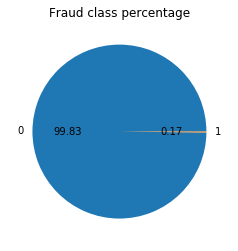

In [16]:
count_classes = pd.value_counts(Y_train['y'], sort = True).sort_index()
#count_classes.plot(kind = 'pie')
plt.pie(count_classes, labels=[0, 1], autopct='%.2f')
plt.title("Fraud class percentage")

## Distributions of features

In [18]:
X_train_normal = X_train[Y_train['y']==0].rename(columns = {'Time':'Normal_Time', 'Amount':'Normal_Amount'})
X_train_fraud = X_train[Y_train['y']==1].rename(columns = {'Time':'Fraud_Time', 'Amount':'Fraud_Amount'})


### Time Distribution

/Users/apple/anaconda2/envs/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1.2e-05)

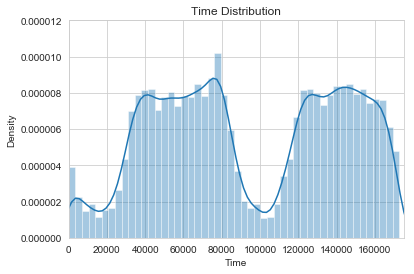

In [19]:
sns.set_style('whitegrid')
sns.distplot(X_train["Time"]).set_title('Time Distribution')
plt.xlabel("Time")
plt.ylabel("Density")
plt.xlim(0,175000)
plt.ylim(0,0.000012)

Text(0, 0.5, 'Density')

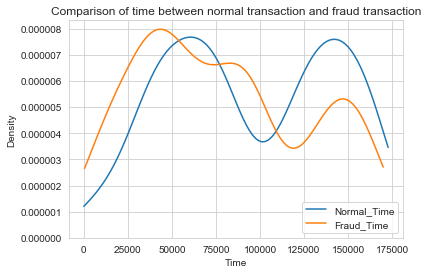

In [29]:
sns.kdeplot(X_train_normal["Normal_Time"], bw=0.3)
sns.kdeplot(X_train_fraud["Fraud_Time"], bw=0.3).set_title("Comparison of time between normal transaction and fraud transaction")
plt.xlabel("Time")
plt.ylabel("Density")


### Amount Distribution

(0, 1619.4999398789068)

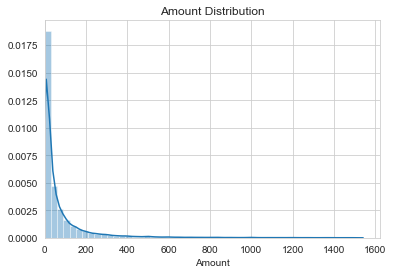

In [31]:
Amount = X_train[X_train['Amount']<=1500]['Amount']

sns.distplot(Amount).set_title('Amount Distribution')
plt.xlim(0)

Text(0.5, 1.0, 'Comparison of Amount between normal transaction and fraud transaction')

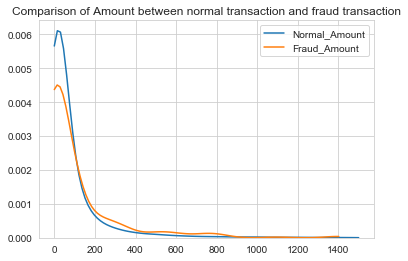

In [11]:
sns.kdeplot(X_train_normal[X_train_normal['Normal_Amount']<=1500]['Normal_Amount'], bw=0.3)
sns.kdeplot(X_train_fraud[X_train_fraud['Fraud_Amount']<=1500]['Fraud_Amount'], bw=0.3)
plt.title("Comparison of Amount between normal transaction and fraud transaction")

### Distribution of Time and Amount

(0, 400)

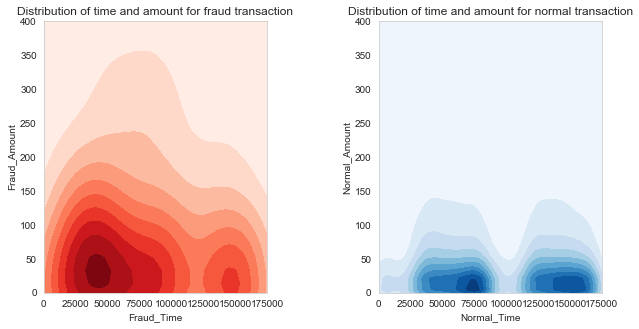

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(X_train_fraud[X_train_fraud['Fraud_Amount']<=1500]['Fraud_Time'], 
            X_train_fraud[X_train_fraud['Fraud_Amount']<=1500]['Fraud_Amount'], cmap="Reds", shade=True)
plt.title("Distribution of time and amount for fraud transaction")
plt.xlim(0,175000)
plt.ylim(0,400)
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
sns.kdeplot(X_train_normal[X_train_normal['Normal_Amount']<=1500]['Normal_Time'], 
            X_train_normal[X_train_normal['Normal_Amount']<=1500]['Normal_Amount'], cmap="Blues", shade=True)
plt.title("Distribution of time and amount for normal transaction")
plt.xlim(0,175000)
plt.ylim(0,400)


### Distribution histogramme of all features

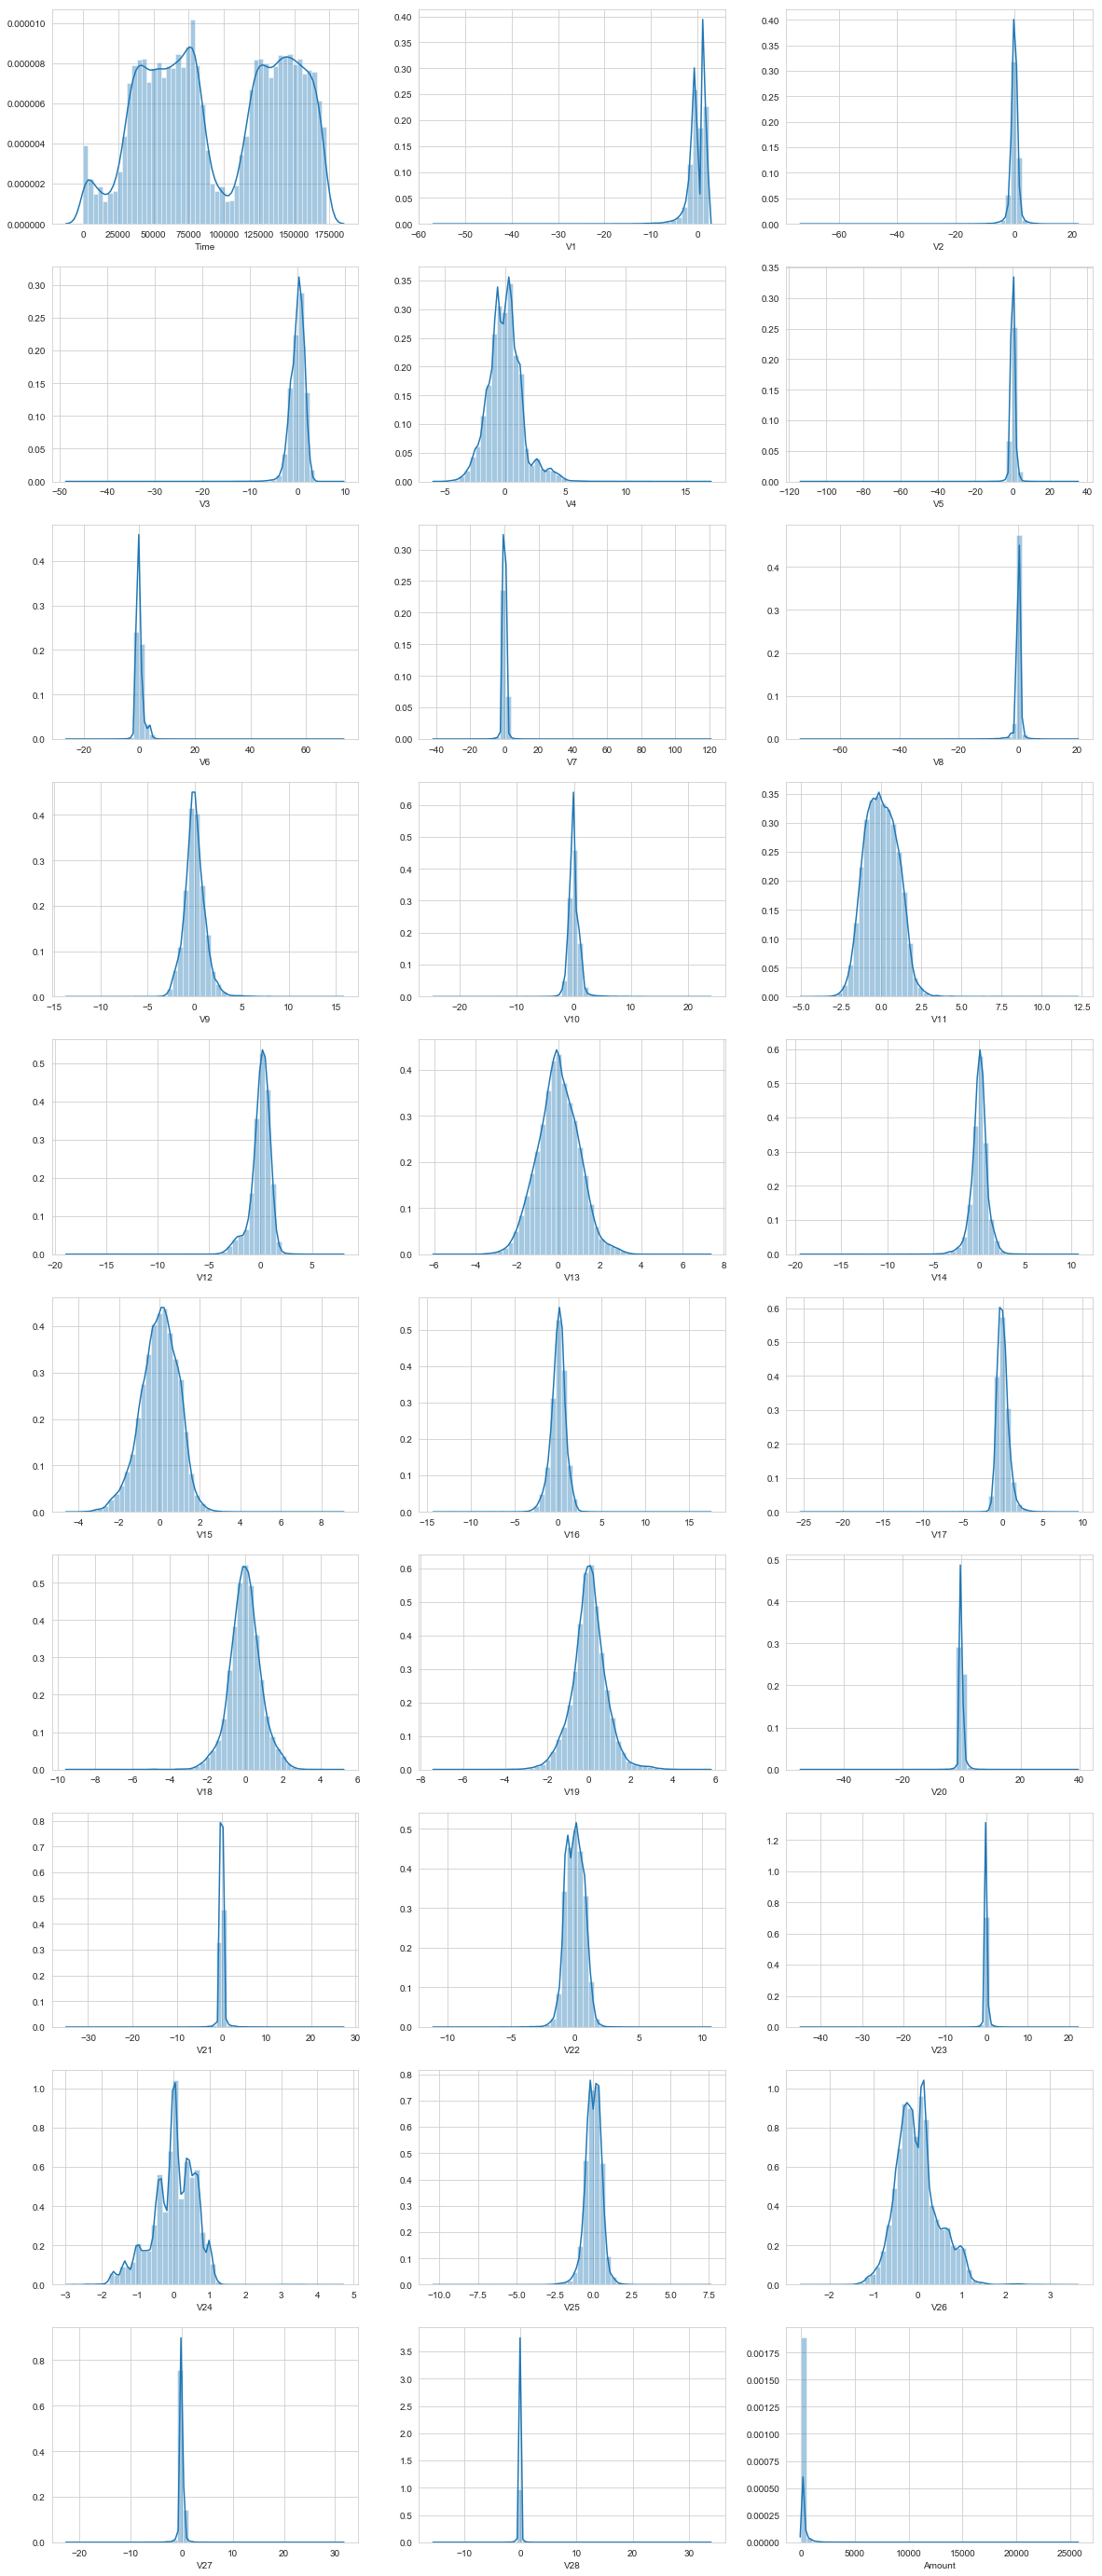

In [16]:
plt.figure(figsize=(20,50))
for i, f in enumerate(X_train.columns):
    plt.subplot(10,3,i+1)
    sns.distplot(X_train[f])

## Correlation Matrix

### Correlation Matrix of different Classes

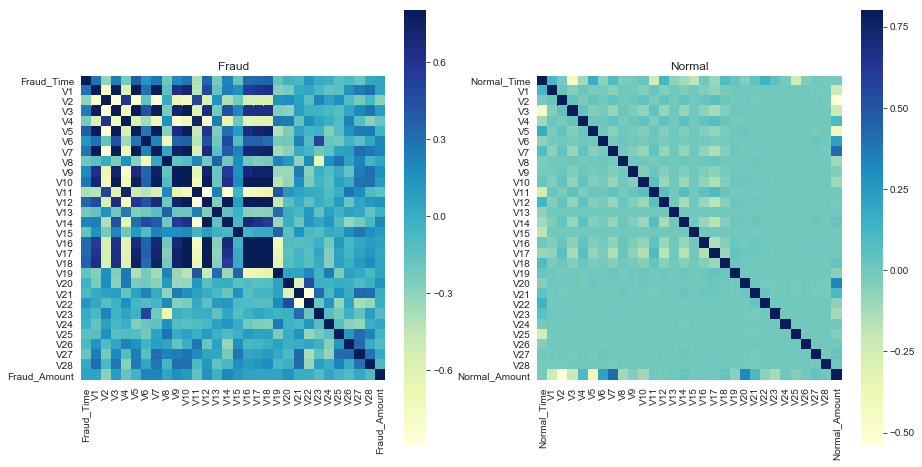

In [12]:
##Before Sampling
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 15, 8))

sns.heatmap(X_train_fraud.corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Fraud')

sns.heatmap(X_train_normal.corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');
ax2.set_title('Normal')

plt.show()

### Correlation Matrix before and after undersampling

In [13]:
#After undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
X_resampled = pd.DataFrame(data=X_resampled, columns=X_train.columns)
y_resampled = pd.DataFrame(data=y_resampled, columns=['y'])

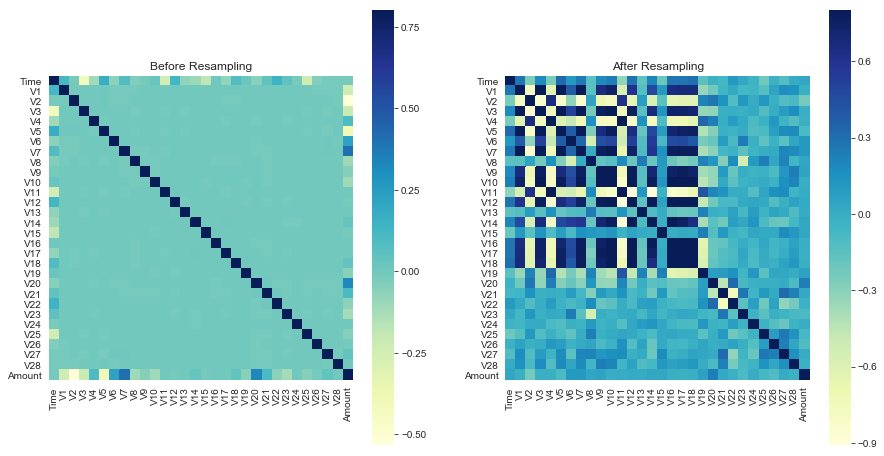

In [14]:

f, (ax1, ax2) = plt.subplots(1,2,figsize =( 15, 8))

sns.heatmap(X_train.corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Before Resampling')

sns.heatmap(X_resampled.corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');
ax2.set_title('After Resampling')

plt.show()

## T-sne for undersampling Data

In [19]:
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_resampled[0:])

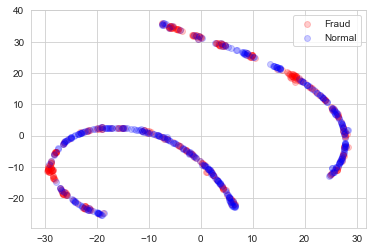

In [23]:
plt.scatter(X_2d[y_resampled['y'] == 1, 0], X_2d[y_resampled['y'] == 1, 1], c='r', label='Fraud', alpha=0.2)
plt.scatter(X_2d[y_resampled['y'] == 0, 0], X_2d[y_resampled['y'] == 0, 1], c='b', label='Normal', alpha=0.2)
plt.legend(['Fraud', 'Normal'])

## Evaluation

In [7]:
# Confusion Matrix function
def draw_confusion_matrix(y_true, y_pred):
    M = confusion_matrix(y_true, y_pred)

    plt.imshow(M, interpolation = 'nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], [0, 1], rotation = 0)
    plt.yticks([0, 1], [0, 1])
    thresh = M.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j, i, M[i, j], color="white" if M[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel('Predicted label')

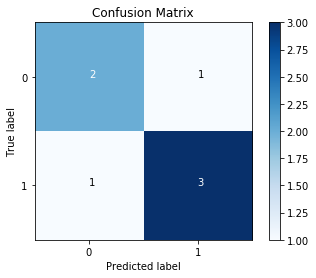

In [13]:
y_true = [1, 0, 1, 1, 0, 1, 0]
y_pred = [1, 1, 1, 0, 0, 1, 0]
draw_confusion_matrix(y_true, y_pred)